<font color = 'brown'>
    
# Introduction

<font color = 'black'>
    
In today's world, the prevalence of overweight and obesity has become a significant public health concern. These conditions are associated with numerous health risks, including diabetes, cardiovascular diseases, and certain cancers. Understanding the factors that contribute to overweight and obesity is crucial for developing effective prevention and intervention strategies.
    

This dataset contains various attributes related to individuals' demographics, lifestyle choices, and health habits. The data includes unique identifiers for each individual, as well as information on their gender, age, height, weight, family history of overweight, dietary habits, physical activity, and other relevant factors. By analyzing this data, we can gain insights into the patterns and determinants of overweight and obesity.

    
The primary aim of this project is to explore and identify key factors that contribute to obesity. By leveraging a range of statistical, machine learning, and deep learning techniques, we hope to uncover significant correlations and build predictive models that can assist in early identification and prevention of obesity. The findings from this analysis could be instrumental for healthcare professionals, policymakers, and individuals in making informed decisions and promoting healthier lifestyles.
    

In this project, we will employ various machine learning methods to analyze the data. Additionally, deep learning techniques  will be utilized to capture complex patterns and improve the accuracy of our predictive models.

    
This comprehensive approach will involve thorough data exploration, preprocessing, and application of advanced analytical methods to derive meaningful conclusions. The insights gained from this study could pave the way for more targeted and effective health interventions, ultimately contributing to the fight against the global obesity epidemic.


<font color = 'green'>
    
### Content :

[Data Loading](#1)
    
[Data description](#a)
    
[Bringing data to specific requirements](#2)
    
[Encoding - One Hot Encoding](#3)
    
[Data Visulation](#4)
    
[Encoding and Scaling for ML and DL](#5)
    
[Machine Learning Methods](#6)
* [Regression Methods - Machine Learning](#7)
* [Classification Methods - Machine Learning](#8)
* [Clustering Methods - Machine Learning](#9)

[Deep Learning Methods](#10)

<a id = "1"></a>
# Data Loading

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

In [3]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [4]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [5]:
sample_submission

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

<a id = "a"></a>
# Data description
1. **Gender**: Gender of the individual
1. **Age**: Age of the individual in years 
1. **Height**: Height of the individual in centimeters 
1. **Weight**: Weight of the individual in kilograms 
1. **family_history_with_overweight**:Whether the individual has a family history of being  overweight 
1. **FAVC**: Whether the individual frequently consumes high-calorie food 
1. **FCVC**: Frequency of daily vegetable consumption 
1. **NCP**: Number of main meals per day 
1. **CAEC**: Frequency of eating between meals 
1. **SMOKE**: Whether the individual smokes 
1. **CH2O**: Daily water intake in liters 
1. **SCC**: Whether the individual monitors their caloric intake 
1. **FAF**: Frequency of physical activity per week 
1. **TUE**: Time spent using technology devices daily, such as TV or computer 
1. **CALC**: Frequency of alcohol consumption 
1. **MTRANS**: Main mode of transportation used by the individual 
1. **NObeyesdad**: Obesity status of the individual (this column is missing in the test dataset).

<a id = "2"></a>
# Bringing data to specific requirements

In [7]:
train["Gender"] = [ 0 if i == "Female" else 1 for i in train["Gender"]]
test["Gender"] = [ 0 if i == "Female" else 1 for i in test["Gender"]]

train["family_history_with_overweight"] = [ 1 if i == "yes" else 0 for i in train["family_history_with_overweight"]]
test["family_history_with_overweight"] = [ 1 if i == "yes" else 0 for i in test["family_history_with_overweight"]]

train["FAVC"] = [ 1 if i == "yes" else 0 for i in train["FAVC"]]
test["FAVC"] = [ 1 if i == "yes" else 0 for i in test["FAVC"]]

train["SMOKE"] = [ 1 if i == "yes" else 0 for i in train["SMOKE"]]
test["SMOKE"] = [ 1 if i == "yes" else 0 for i in test["SMOKE"]]

train["SCC"] = [ 1 if i == "yes" else 0 for i in train["SCC"]]
test["SCC"] = [ 1 if i == "yes" else 0 for i in test["SCC"]]

In [8]:
train['CALC'].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [9]:
train.loc[train.CALC == "no", 'CALC'] = 0
train.loc[train.CALC == "Sometimes", 'CALC'] = 1
train.loc[train.CALC == "Frequently", 'CALC'] = 2
train.loc[train.CALC == "Always", 'CALC'] = 2

test.loc[test.CALC == "no", 'CALC'] = 0
test.loc[test.CALC == "Sometimes", 'CALC'] = 1
test.loc[test.CALC == "Frequently", 'CALC'] = 2
test.loc[test.CALC == "Always", 'CALC'] = 2

train['CALC'] = train['CALC'].astype(int)
test['CALC'] = test['CALC'].astype(int)

In [10]:
train.loc[train.NObeyesdad == "Insufficient_Weight", 'NObeyesdad'] = 0
train.loc[train.NObeyesdad == "Normal_Weight", 'NObeyesdad'] = 1
train.loc[train.NObeyesdad == "Overweight_Level_I", 'NObeyesdad'] = 2
train.loc[train.NObeyesdad == "Overweight_Level_II", 'NObeyesdad'] = 3
train.loc[train.NObeyesdad == "Obesity_Type_I", 'NObeyesdad'] = 4
train.loc[train.NObeyesdad == "Obesity_Type_II", 'NObeyesdad'] = 5
train.loc[train.NObeyesdad == "Obesity_Type_III", 'NObeyesdad'] = 6

sample_submission.loc[sample_submission.NObeyesdad == "Insufficient_Weight", 'NObeyesdad'] = 0
sample_submission.loc[sample_submission.NObeyesdad == "Normal_Weight", 'NObeyesdad'] = 1
sample_submission.loc[sample_submission.NObeyesdad == "Overweight_Level_I", 'NObeyesdad'] = 2
sample_submission.loc[sample_submission.NObeyesdad == "Overweight_Level_II", 'NObeyesdad'] = 3
sample_submission.loc[sample_submission.NObeyesdad == "Obesity_Type_I", 'NObeyesdad'] = 4
sample_submission.loc[sample_submission.NObeyesdad == "Obesity_Type_II", 'NObeyesdad'] = 5
sample_submission.loc[sample_submission.NObeyesdad == "Obesity_Type_III", 'NObeyesdad'] = 6
sample_submission['NObeyesdad'] = sample_submission['NObeyesdad'].astype(int)
train['NObeyesdad'] = train['NObeyesdad'].astype(int)


In [11]:
train.loc[train.CAEC == "no", 'CAEC'] = 0
train.loc[train.CAEC == "Sometimes", 'CAEC'] = 1
train.loc[train.CAEC == "Frequently", 'CAEC'] = 2
train.loc[train.CAEC == "Always", 'CAEC'] = 3

test.loc[test.CAEC == "no", 'CAEC'] = 0
test.loc[test.CAEC == "Sometimes", 'CAEC'] = 1
test.loc[test.CAEC == "Frequently", 'CAEC'] = 2
test.loc[test.CAEC == "Always", 'CAEC'] = 3

train['CAEC'] = train['CAEC'].astype(int)
test['CAEC'] = test['CAEC'].astype(int)

In [12]:
non_categ_data = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
categ_data = ["Gender","family_history_with_overweight","FAVC","SMOKE","CAEC","CALC","NObeyesdad"]

genel_data = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE","Gender",
              "family_history_with_overweight","FAVC","SMOKE","CAEC","CALC","NObeyesdad"]

two_categ_data = ["Gender","family_history_with_overweight","FAVC","SMOKE"]
multy_categ_data = ["CAEC","CALC","NObeyesdad"]

#2li sınıflar :
#Gender,family_history_with_overweight,FAVC,SMOKE
        #'MTRANS_Automobile', 'MTRANS_Bike','MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'

#çoklu sınıflar:
#CAEC 4,CALC 3 ,NObeyesdad 7

In [13]:
del(train["id"])
del(test["id"])
del(sample_submission["id"])

<a id = "3"></a>
# Encoding - One Hot Encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output = False,drop = None)
encoded_embarked = encoder.fit_transform(train[["MTRANS"]])
encoded_embarked_df = pd.DataFrame(encoded_embarked ,columns = encoder.get_feature_names_out(["MTRANS"]))

train.drop(columns = ["MTRANS"],inplace=True)
train = train.reset_index(drop=True)
encoded_embarked_df = encoded_embarked_df.reset_index(drop=True)
train = pd.concat([train,encoded_embarked_df],axis=1)


In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output = False,drop = None)
encoded_embarked = encoder.fit_transform(test[["MTRANS"]])
encoded_embarked_df = pd.DataFrame(encoded_embarked ,columns = encoder.get_feature_names_out(["MTRANS"]))

test.drop(columns = ["MTRANS"],inplace=True)
test = test.reset_index(drop=True)
encoded_embarked_df = encoded_embarked_df.reset_index(drop=True)
test = pd.concat([test,encoded_embarked_df],axis=1)


In [16]:
train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,...,0,0.000000,0.976473,1,3,0.0,0.0,0.0,1.0,0.0
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,...,0,1.000000,1.000000,0,1,1.0,0.0,0.0,0.0,0.0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,...,0,0.866045,1.673584,0,0,0.0,0.0,0.0,1.0,0.0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,...,0,1.467863,0.780199,1,6,0.0,0.0,0.0,1.0,0.0
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,...,0,1.967973,0.931721,1,3,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,1,0,...,0,1.330519,0.196680,1,5,0.0,0.0,0.0,1.0,0.0
20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,2,0,...,0,2.000000,1.000000,1,0,0.0,0.0,0.0,1.0,0.0
20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,1,0,...,0,1.158040,1.198439,0,5,0.0,0.0,0.0,1.0,0.0
20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,1,0,...,0,0.000000,0.973834,0,3,1.0,0.0,0.0,0.0,0.0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  int64  
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  int64  
 9   SMOKE                           20758 non-null  int64  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  FAF                             

<a id = "4"></a>
# Data Visulation

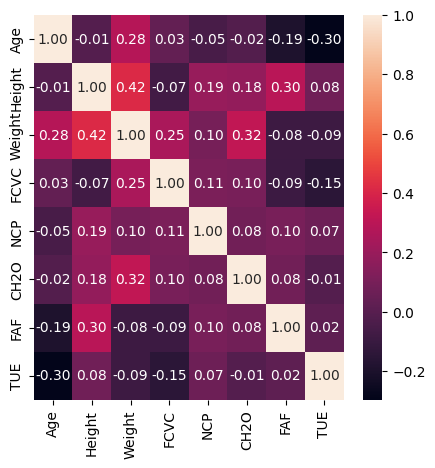

In [18]:
plt.figure(figsize = (5,5))
sns.heatmap(train[non_categ_data].corr(),annot = True,fmt=".2f")
plt.show()

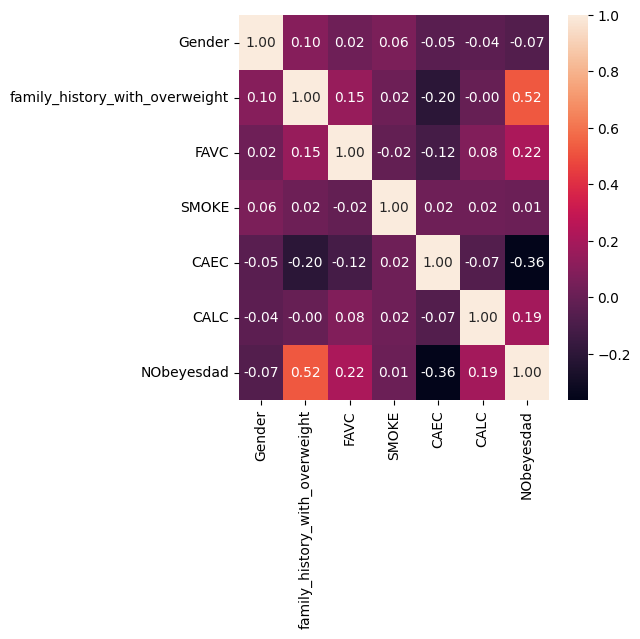

In [19]:
plt.figure(figsize = (5,5))
sns.heatmap(train[categ_data].corr(),annot = True,fmt=".2f")
plt.show()

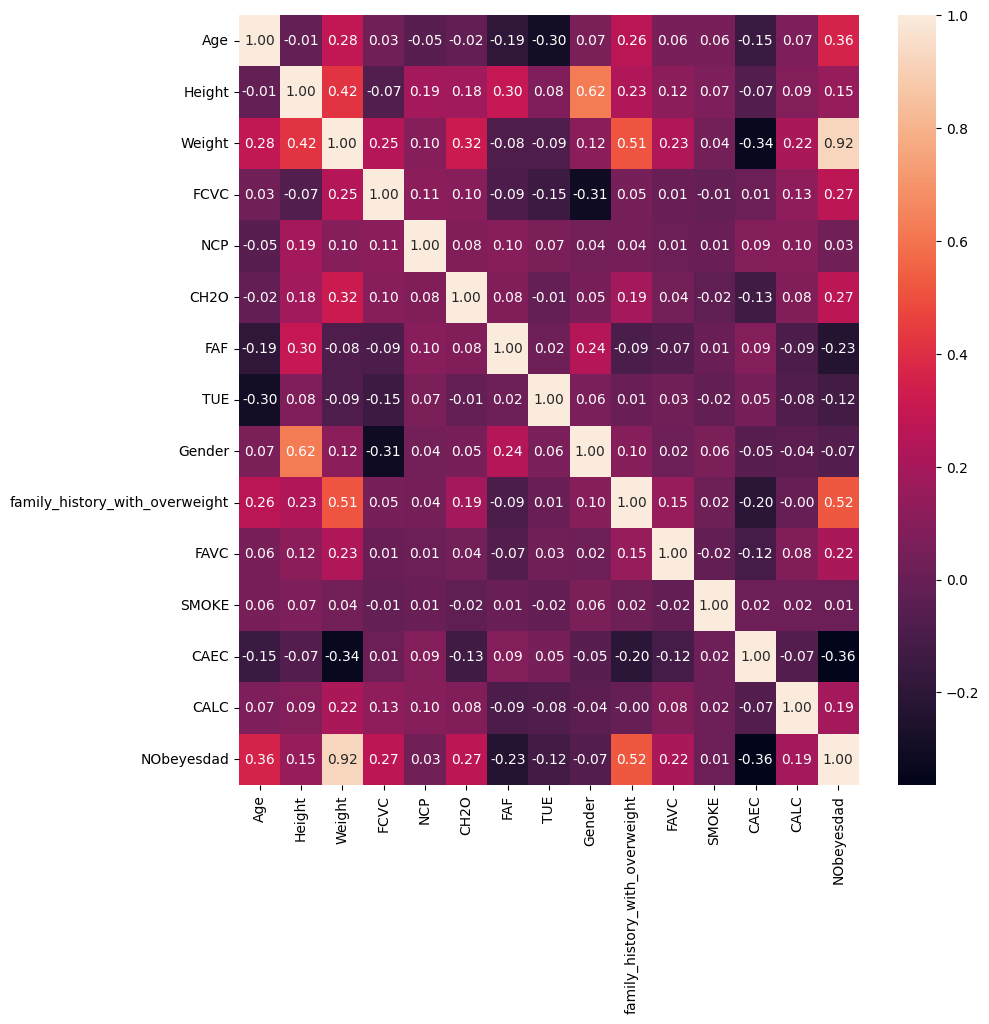

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(train[genel_data].corr(),annot = True,fmt=".2f")
plt.show()

In [21]:
train[["Weight","NObeyesdad"]].groupby("NObeyesdad",as_index = False).mean().sort_values(by = "Weight" ,ascending = True)

,NObeyesdad,Weight
0,0,49.860773
1,1,61.533289
2,2,74.228266
3,3,82.085513
4,4,92.371026
5,5,115.995914
6,6,117.697452


In [22]:
for i in non_categ_data:
    for j in categ_data:
        print(train[[j,i]].groupby([j], as_index = False).mean().sort_values(by=i,ascending = True))
        print("\n\n")

   Gender        Age
0       0  23.464952
1       1  24.221793



   family_history_with_overweight        Age
0                               0  20.670143
1                               1  24.539741



   FAVC        Age
0     0  22.784691
1     1  23.940710



   SMOKE        Age
0      0  23.806990
1      1  26.756709



   CAEC        Age
2     2  20.964648
0     0  21.342797
3     3  22.150628
1     1  24.333443



   CALC        Age
0     0  23.210167
1     1  24.013670
2     2  25.111771



   NObeyesdad        Age
0           0  19.336502
1           1  20.801388
2           2  23.045197
6           6  24.126847
4           4  25.023615
3           3  26.032084
5           5  27.707128



   Gender    Height
0       0  1.646032
1       1  1.754909



   family_history_with_overweight    Height
0                               0  1.657784
1                               1  1.709589



   FAVC    Height
0     0  1.667258
1     1  1.703331



   SMOKE    Height
0      0  1.699579


In [23]:
for i in non_categ_data:
    if i != "Weight":
        print(train[[i,"Weight"]].groupby([i], as_index = False).mean().sort_values(by="Weight",ascending = True))
        print("\n")

           Age      Weight
188  18.811190   40.202773
401  20.482070   40.202773
214  18.939190   41.397378
152  18.391943   41.397378
254  19.220108   41.634298
..         ...         ...
543  21.362877  152.371911
364  20.125401  152.371911
444  20.907833  152.435630
257  19.233541  152.473625
149  18.372563  152.473675

[1703 rows x 2 columns]


        Height      Weight
70    1.541039   40.550902
51    1.530884   40.685761
75    1.544263   41.076781
45    1.529724   41.171731
55    1.532733   41.220175
...        ...         ...
1565  1.807576  143.224238
1558  1.806827  147.567930
1555  1.805803  148.699068
1649  1.827730  152.720545
1570  1.809871  153.097182

[1833 rows x 2 columns]


         FCVC      Weight
744  2.800000   39.000000
244  2.009796   41.397378
660  2.686010   41.524444
194  1.915279   41.669346
671  2.707666   41.706283
..        ...         ...
329  2.115354  128.114161
559  2.507841  129.232216
405  2.231915  129.449886
508  2.408561  129.466541
359  2.16540

In [24]:
def bar_plot(variable):
    var = train[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(6,3))
    sns.barplot(x = train[variable],y = train["Weight"])
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    plt.title("{} and Weight relation".format(variable))
    plt.show()
    print("\n {} \n".format(varValue))

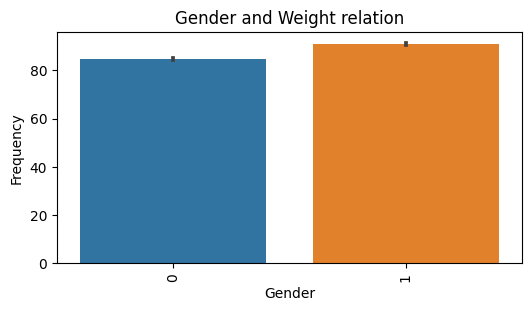


 Gender
0    10422
1    10336
Name: count, dtype: int64 



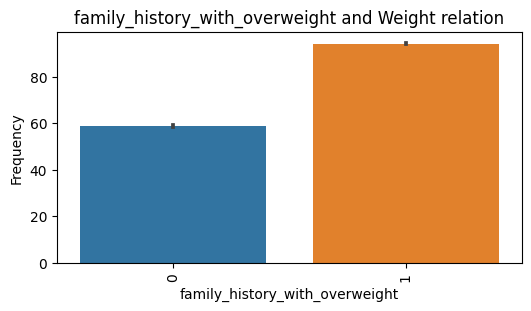


 family_history_with_overweight
1    17014
0     3744
Name: count, dtype: int64 



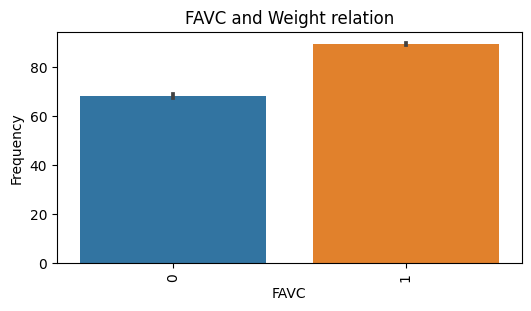


 FAVC
1    18982
0     1776
Name: count, dtype: int64 



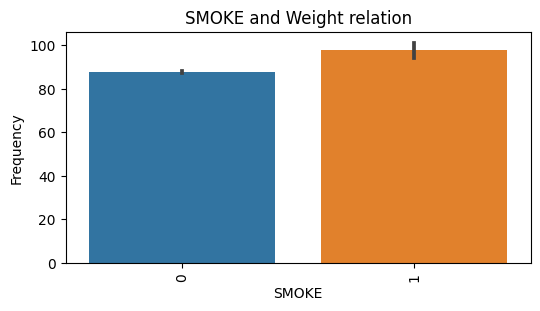


 SMOKE
0    20513
1      245
Name: count, dtype: int64 



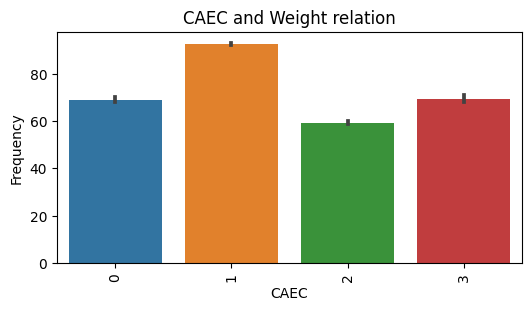


 CAEC
1    17529
2     2472
3      478
0      279
Name: count, dtype: int64 



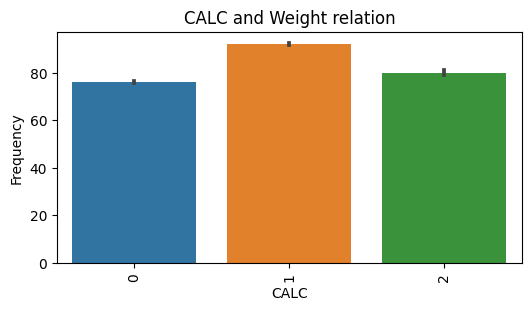


 CALC
1    15066
0     5163
2      529
Name: count, dtype: int64 



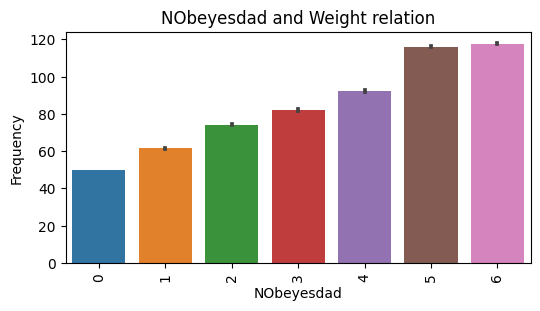


 NObeyesdad
6    4046
5    3248
1    3082
4    2910
0    2523
3    2522
2    2427
Name: count, dtype: int64 



In [25]:
for i in categ_data:
    bar_plot(i)

In [26]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train[variable],bins = 150)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

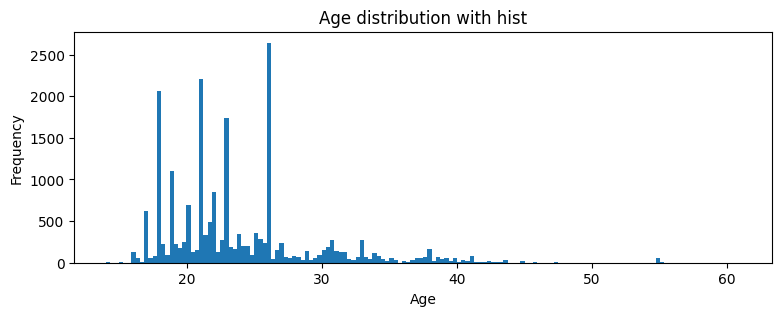

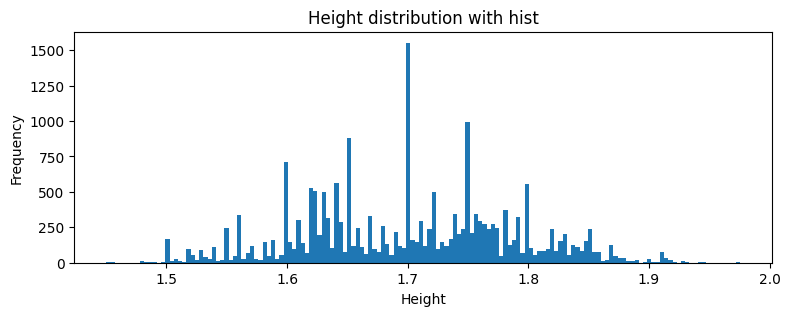

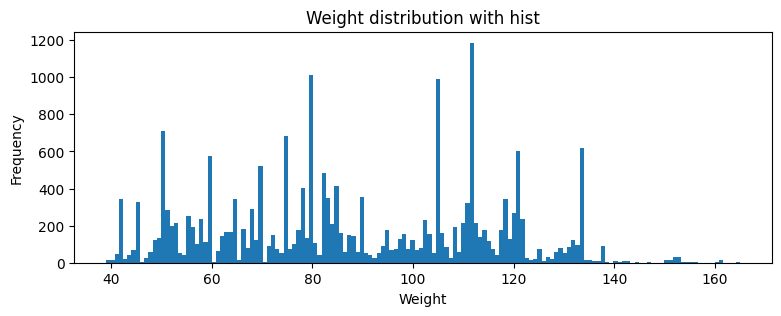

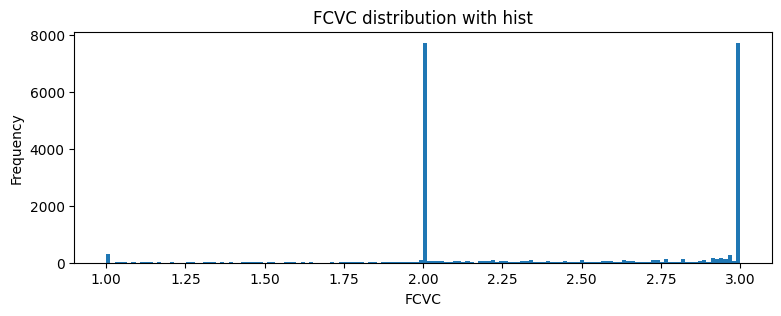

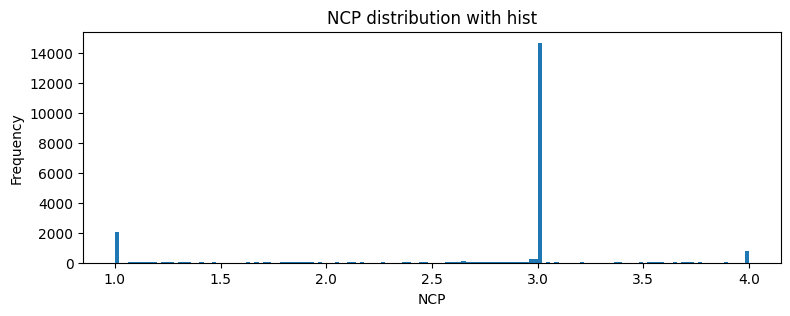

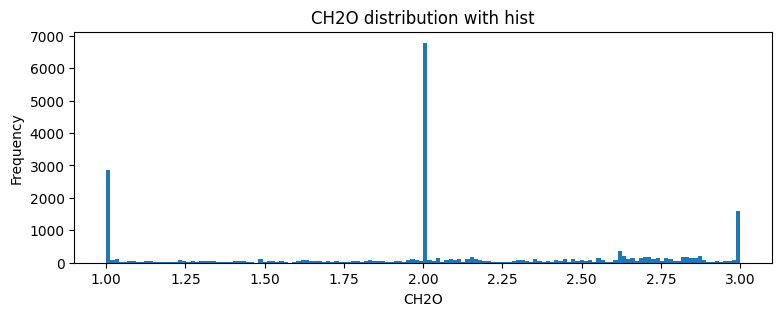

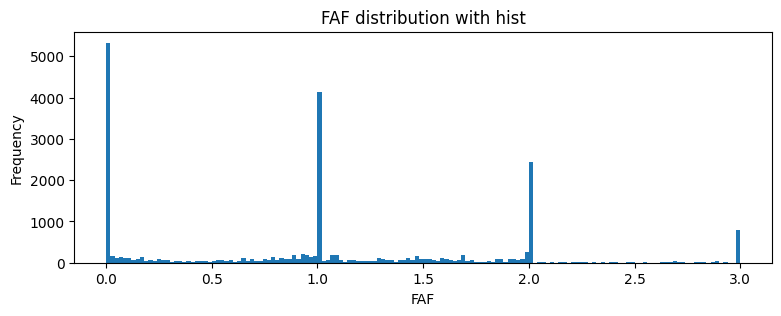

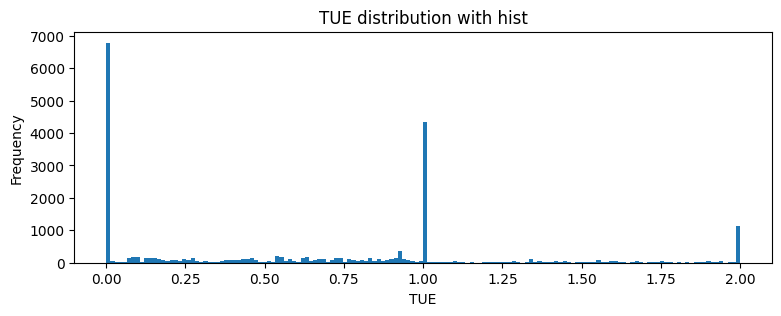

In [27]:
for i in non_categ_data:
    plot_hist(i)

<Figure size 600x200 with 0 Axes>

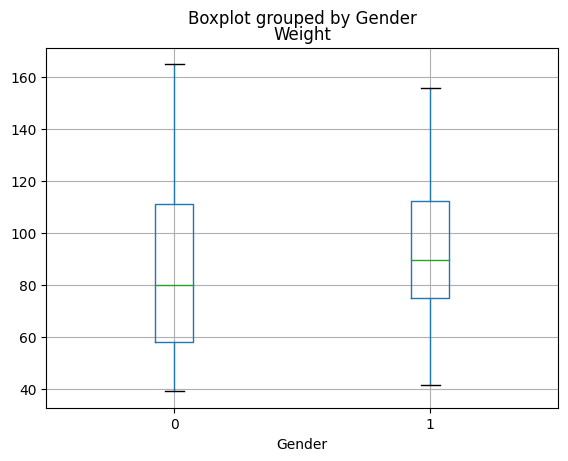

<Figure size 600x200 with 0 Axes>

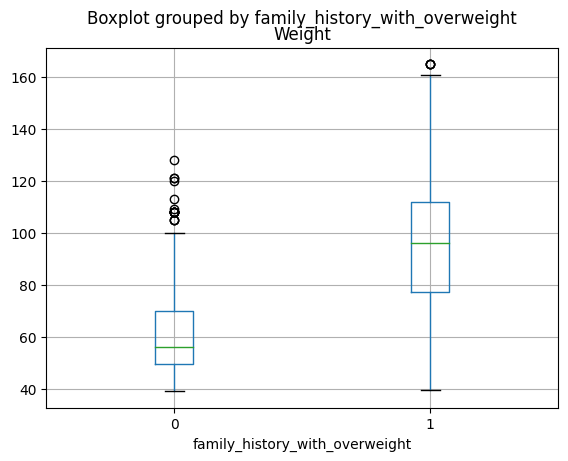

<Figure size 600x200 with 0 Axes>

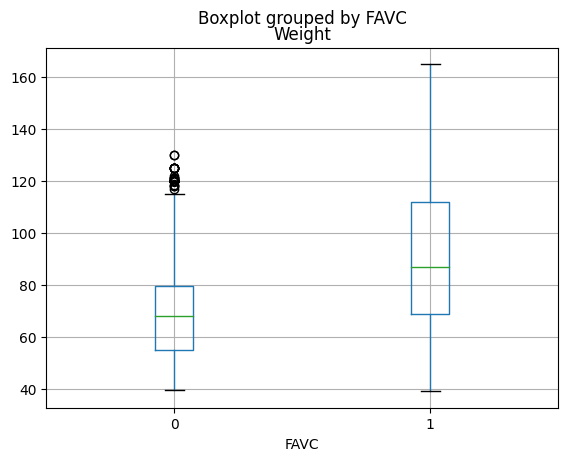

<Figure size 600x200 with 0 Axes>

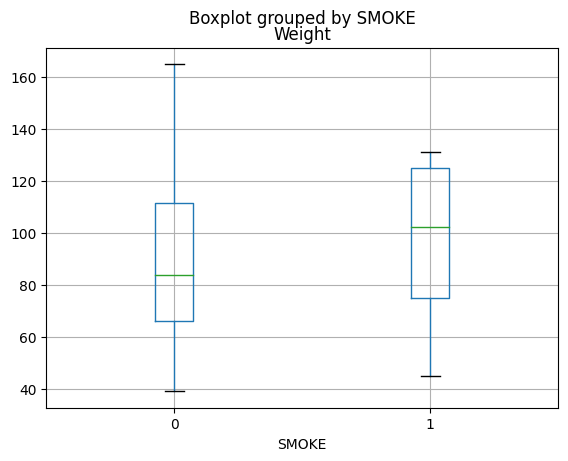

<Figure size 600x200 with 0 Axes>

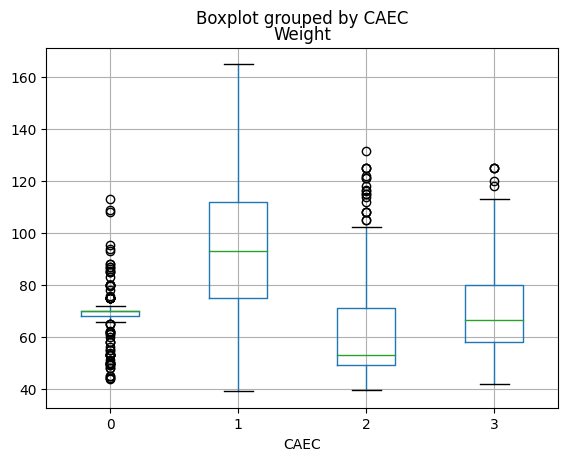

<Figure size 600x200 with 0 Axes>

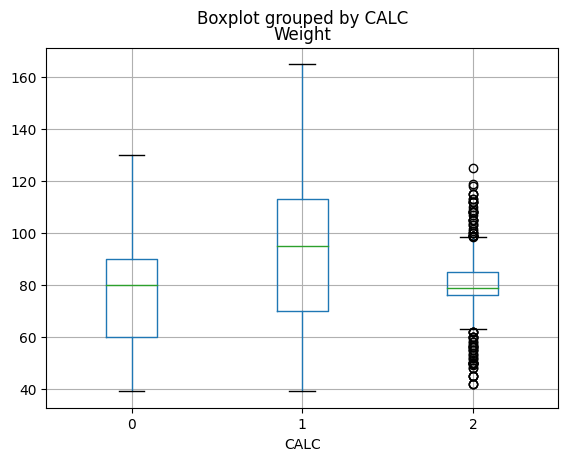

<Figure size 600x200 with 0 Axes>

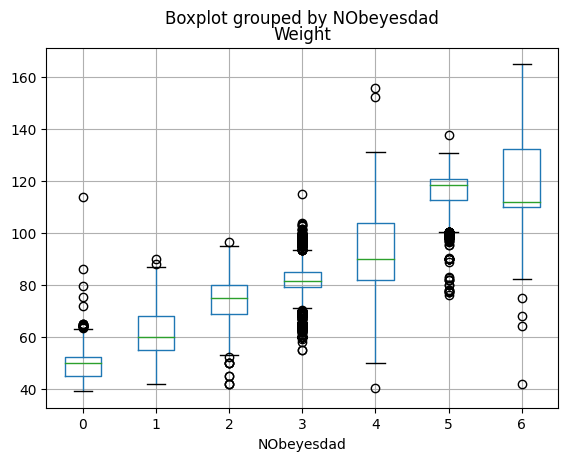

In [28]:
for i in categ_data:
    plt.figure(figsize = (6,2))
    train.boxplot(column = "Weight",by =i)
    plt.show()

In [29]:
def plot_pie_for_all_columns(data):
    for column in categ_data:
        labels = train[column].value_counts().index
        sizes = train[column].value_counts().values
        explode = [0] * len(sizes)
        
        plt.figure(figsize=(5, 5))
        plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
        plt.title(column, color='blue', fontsize=15)
        plt.show()
        print("\n\n\n")

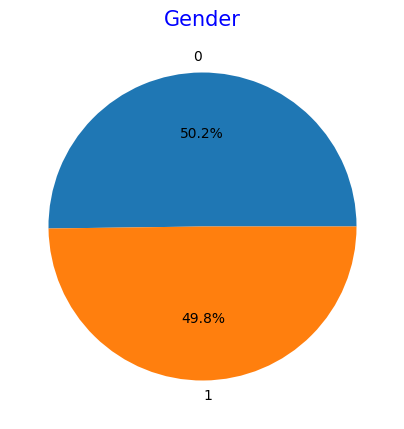

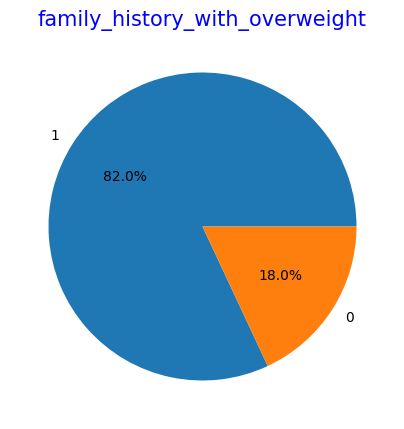

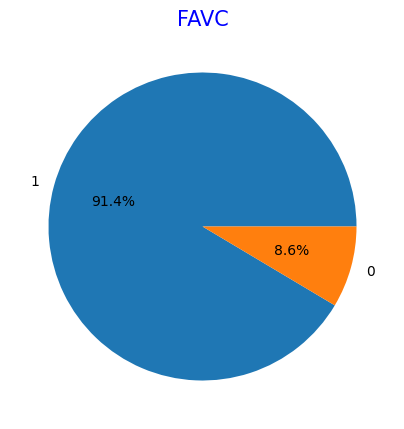

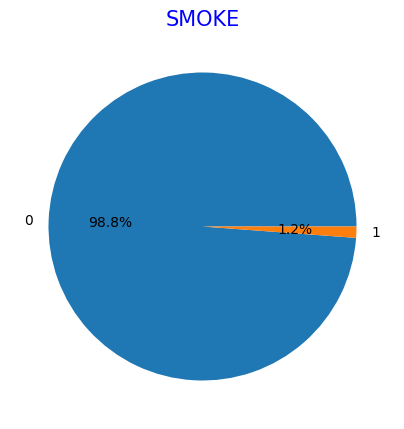

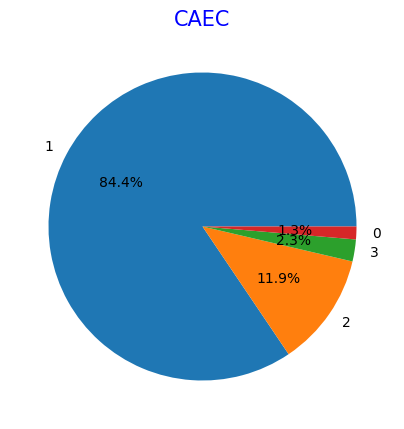

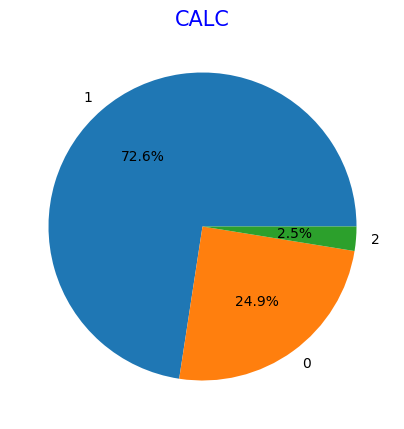

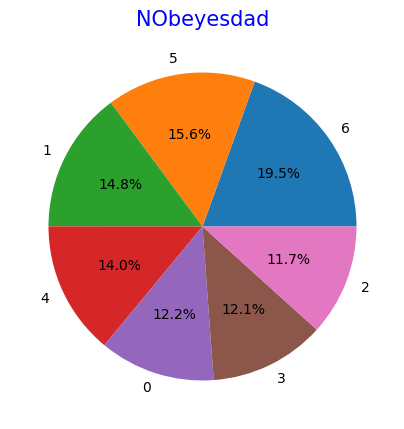

In [30]:
plot_pie_for_all_columns(train)

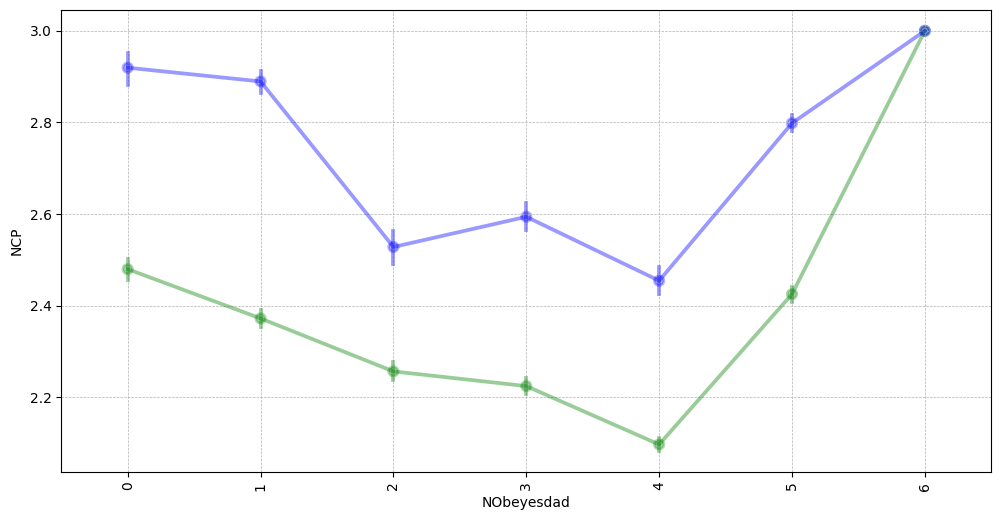

In [31]:
f, ax = plt.subplots(figsize=(12, 6))

pointplot1 = sns.pointplot(data=train, x="NObeyesdad", y="FCVC", color="green", ax=ax)
pointplot2 = sns.pointplot(data=train, x="NObeyesdad", y="NCP", color="blue", ax=ax)

plt.setp(pointplot2.lines, alpha=0.4)
plt.setp(pointplot2.collections, alpha=0.3)  # Markers için

plt.xticks(rotation=90)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

<a id ="5"></a>
# Encoding and Scaling for ML and DL

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[non_categ_data] = scaler.fit_transform(train[non_categ_data])
#Perform fit transform only for continuous values

In [33]:
train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,0.105699,-0.002828,-0.235713,1,1,-0.836279,0.314684,1,0,...,0,-1.171141,0.597438,1,3,0.0,0.0,0.0,1.0,0.0
1,0,-1.027052,-1.606291,-1.170931,1,1,-0.836279,0.338364,2,0,...,0,0.021775,0.636513,0,1,1.0,0.0,0.0,0.0,0.0
2,0,-1.027052,0.128451,-1.430012,1,1,-1.060332,-1.913423,1,0,...,0,-0.138022,1.755239,0,0,0.0,0.0,0.0,1.0,0.0
3,0,-0.507929,0.120090,1.644770,1,1,1.039171,0.338364,1,0,...,0,0.579896,0.271455,1,6,0.0,0.0,0.0,1.0,0.0
4,1,1.371197,2.450367,0.224054,1,1,0.438397,-1.119801,1,0,...,0,1.176486,0.523111,1,3,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,0.227725,0.760293,0.996987,1,1,0.888355,0.338364,1,0,...,0,0.416056,-0.697686,1,5,0.0,0.0,0.0,1.0,0.0
20754,1,-1.027052,0.111729,-1.436296,0,1,1.039171,1.756085,2,0,...,0,1.214691,0.636513,1,0,0.0,0.0,0.0,1.0,0.0
20755,1,-0.657669,1.366537,0.670717,1,1,-0.071439,0.338364,1,0,...,0,0.210303,0.966092,0,5,0.0,0.0,0.0,1.0,0.0
20756,1,1.760067,-0.002805,-0.165574,1,1,0.422594,-1.119801,1,0,...,0,-1.171141,0.593055,0,3,1.0,0.0,0.0,0.0,0.0


<a id ="6"></a>
# Machine Learning Methods

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  int64  
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  int64  
 9   SMOKE                           20758 non-null  int64  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  FAF                             

<a id ="7"></a>
# Regression Methods - Machine Learning

In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

for i in genel_data:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print("Label Name: {}".format(i))
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print("\n")

Label Name: Age
Mean Squared Error: 0.4311059374441724
R-squared: 0.5287580958947492


Label Name: Height
Mean Squared Error: 0.3457151223635162
R-squared: 0.6588646626308029


Label Name: Weight
Mean Squared Error: 0.06690066623721395
R-squared: 0.9341696657528102


Label Name: FCVC
Mean Squared Error: 0.7876633373449687
R-squared: 0.2164989850506096


Label Name: NCP
Mean Squared Error: 0.928831864655773
R-squared: 0.08693055930343396


Label Name: CH2O
Mean Squared Error: 0.8830786828377529
R-squared: 0.13077955997495272


Label Name: FAF
Mean Squared Error: 0.7625808797093335
R-squared: 0.2165365770810026


Label Name: TUE
Mean Squared Error: 0.8541457702436688
R-squared: 0.12201855779730542


Label Name: Gender
Mean Squared Error: 0.1304795986943162
R-squared: 0.4780641660889883


Label Name: family_history_with_overweight
Mean Squared Error: 0.10418618785606541
R-squared: 0.32765865688160367


Label Name: FAVC
Mean Squared Error: 0.07241860797271359
R-squared: 0.09681504904895388

In [36]:
non_categ_data = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
categ_data = ["Gender","family_history_with_overweight","FAVC","SMOKE","CAEC","CALC","NObeyesdad"]

genel_data = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE","Gender",
              "family_history_with_overweight","FAVC","SMOKE","CAEC","CALC","NObeyesdad"]

two_categ_data = ["Gender","family_history_with_overweight","FAVC","SMOKE"]
multy_categ_data = ["CAEC","CALC","NObeyesdad"]

In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

for i in genel_data:
    x = train.drop(columns = i)
    y = train[i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 42)
    linmodel = LinearRegression()
    linmodel.fit(x_train,y_train)
    y_pred = linmodel.predict(x_test)
    
    
    poly = PolynomialFeatures(degree = 1)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)
    
    modelpoly = LinearRegression()
    modelpoly.fit(x_poly_train,y_train)
    y_pred2 = modelpoly.predict(x_poly_test)
    
    mse1 = mean_squared_error(y_test,y_pred)
    mse2 = mean_squared_error(y_test,y_pred2)
    r= r2_score(y_test,y_pred)
    r2= r2_score(y_test,y_pred2)
    
    print(f'Label Name: {i}')
    print(f'Linear Regression - Mean Squared Error: {mse1}')
    print(f'Linear Regression - R-squared: {r}')
    print(f'Polynomial Regression - Mean Squared Error: {mse2}')
    print(f'Polynomial Regression - R-squared: {r2}')
    print("\n")    

Label Name: Age
Linear Regression - Mean Squared Error: 0.4311059374441724
Linear Regression - R-squared: 0.5287580958947492
Polynomial Regression - Mean Squared Error: 0.4311059374441724
Polynomial Regression - R-squared: 0.5287580958947492


Label Name: Height
Linear Regression - Mean Squared Error: 0.3457151223635162
Linear Regression - R-squared: 0.6588646626308029
Polynomial Regression - Mean Squared Error: 0.3457151223635161
Polynomial Regression - R-squared: 0.658864662630803


Label Name: Weight
Linear Regression - Mean Squared Error: 0.06690066623721395
Linear Regression - R-squared: 0.9341696657528102
Polynomial Regression - Mean Squared Error: 0.06690066623721395
Polynomial Regression - R-squared: 0.9341696657528102


Label Name: FCVC
Linear Regression - Mean Squared Error: 0.7876633373449687
Linear Regression - R-squared: 0.2164989850506096
Polynomial Regression - Mean Squared Error: 0.7876633373449689
Polynomial Regression - R-squared: 0.2164989850506095


Label Name: NCP


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsRegressor

for col in genel_data:
    x = train.drop(columns = col)
    y = train[col]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state =42)
    knn = KNeighborsRegressor(n_neighbors = 7)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    rmse = mean_squared_error(y_test,y_pred,squared = False)
    mse = mean_squared_error(y_test,y_pred,squared = True)
    r2 = r2_score(y_test, y_pred)
    print(f"Column name: {col}")
    print(f"RMSE: {rmse}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")

Column name: Age
RMSE: 0.5668887595018575
MSE: 0.32136286564955474
R2 Score: 0.6487182486624247


Column name: Height
RMSE: 0.6381265315884964
MSE: 0.40720547031716436
R2 Score: 0.5981888945281265


Column name: Weight
RMSE: 0.20607580760060842
MSE: 0.04246723847824298
R2 Score: 0.958212187399372


Column name: FCVC
RMSE: 0.8389950520018797
MSE: 0.7039126972836368
R2 Score: 0.29980705384037976


Column name: NCP
RMSE: 0.9012893903401584
MSE: 0.8123225651397346
R2 Score: 0.20146267754044456


Column name: CH2O
RMSE: 0.8997140182503137
MSE: 0.8094853146361258
R2 Score: 0.20321802002879663


Column name: FAF
RMSE: 0.82501994853402
MSE: 0.6806579154790771
R2 Score: 0.3007029228146797


Column name: TUE
RMSE: 0.909556277259629
MSE: 0.827292621502395
R2 Score: 0.14962106673769526


Column name: Gender
RMSE: 0.289711917537721
MSE: 0.08393299516338328
R2 Score: 0.6642568013572709


Column name: family_history_with_overweight
RMSE: 0.3178649132926009
MSE: 0.10103810310251268
R2 Score: 0.3479740

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report

for col in genel_data:
    
    x = train.drop(columns=[col])
    y = train[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
   
    model = DecisionTreeRegressor(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test,y_pred,squared = False)
    mse = mean_squared_error(y_test,y_pred,squared = True)
    r2 = r2_score(y_test, y_pred)
    print(f"Column name: {col}")
    print(f"RMSE: {rmse}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")

Column name: Age
RMSE: 0.7306375664792111
MSE: 0.5338312535506635
R2 Score: 0.4164690519330071


Column name: Height
RMSE: 0.7254524233237316
MSE: 0.5262812185062746
R2 Score: 0.4806905761055117


Column name: Weight
RMSE: 0.25323332214565836
MSE: 0.06412711544492679
R2 Score: 0.9368988429938921


Column name: FCVC
RMSE: 1.0801997829470542
MSE: 1.1668315710788633
R2 Score: -0.16066557483414767


Column name: NCP
RMSE: 1.1471206784964185
MSE: 1.3158858510340838
R2 Score: -0.2935550595795853


Column name: CH2O
RMSE: 1.162268485462259
MSE: 1.350868032298733
R2 Score: -0.32966872405661873


Column name: FAF
RMSE: 1.1208922929973972
MSE: 1.2563995325009631
R2 Score: -0.2908048240892511


Column name: TUE
RMSE: 1.1847164953440865
MSE: 1.4035531743403749
R2 Score: -0.44272053219204777


Column name: Gender
RMSE: 0.3444089628895999
MSE: 0.11861753371868979
R2 Score: 0.5255140114051501


Column name: family_history_with_overweight
RMSE: 0.41794121056833994
MSE: 0.17467485549132947
R2 Score: -0

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report

for col in genel_data:
    
    x = train.drop(columns=[col])
    y = train[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
   
    model = RandomForestRegressor(n_estimators=600, random_state=42)    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test,y_pred,squared = False)
    mse = mean_squared_error(y_test,y_pred,squared = True)
    r2 = r2_score(y_test, y_pred)
    print(f"Column name: {col}")
    print(f"RMSE: {rmse}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")

Column name: Age
RMSE: 0.5307277808786036
MSE: 0.2816719773963271
R2 Score: 0.6921043589697129


Column name: Height
RMSE: 0.534785125834424
MSE: 0.2859951308137406
R2 Score: 0.7177935267364254


Column name: Weight
RMSE: 0.1811325563871664
MSE: 0.032809002983350016
R2 Score: 0.9677159024836502


Column name: FCVC
RMSE: 0.7890729962876296
MSE: 0.6226361934703375
R2 Score: 0.3806540606896631


Column name: NCP
RMSE: 0.8387201800653438
MSE: 0.7034515404488427
R2 Score: 0.308486143686726


Column name: CH2O
RMSE: 0.843367622712568
MSE: 0.7112689470398486
R2 Score: 0.2998930682649946


Column name: FAF
RMSE: 0.802412292326754
MSE: 0.6438654868770761
R2 Score: 0.3385028766517253


Column name: TUE
RMSE: 0.8612816993514469
MSE: 0.7418061656377163
R2 Score: 0.2374930956391038


Column name: Gender
RMSE: 0.25083429607236274
MSE: 0.06291784408611774
R2 Score: 0.7483202144275036


Column name: family_history_with_overweight
RMSE: 0.30883501533387303
MSE: 0.09537906669627358
R2 Score: 0.384493365

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR #regression for svm suport vector machine
from sklearn.metrics import mean_squared_error, r2_score

for i in genel_data:
    
    x = train.drop(columns=i)
    y = train[i]
    
    # Veriyi eğitim ve test kümelerine ayırın
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # SVR modelini oluşturun ve eğitin
    model = SVR(kernel='rbf', C=1.0, epsilon=0.2, gamma='scale')
    model.fit(x_train, y_train)
    
    # Tahminler yapın
    y_pred = model.predict(x_test)
    
    # Regresyon metriklerini hesaplayın
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Variable: {i}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')


Variable: Age
Mean Squared Error: 0.30845969966867076
R-squared: 0.6628226995124092


Variable: Height
Mean Squared Error: 0.30767139305461205
R-squared: 0.6964044160088143


Variable: Weight
Mean Squared Error: 0.038854976577541264
R-squared: 0.9617666573573903


Variable: FCVC
Mean Squared Error: 0.6608238286549389
R-squared: 0.34266822396593555


Variable: NCP
Mean Squared Error: 0.8466045878011951
R-squared: 0.16776242623710746


Variable: CH2O
Mean Squared Error: 0.7780682356446132
R-squared: 0.2341420676318362


Variable: FAF
Mean Squared Error: 0.6579989031796624
R-squared: 0.3239824303507586


Variable: TUE
Mean Squared Error: 0.7810710001703595
R-squared: 0.19713254214600917


Variable: Gender
Mean Squared Error: 0.07934819091711848
R-squared: 0.6825966311202301


Variable: family_history_with_overweight
Mean Squared Error: 0.10080309552265027
R-squared: 0.3494906567862769


Variable: FAVC
Mean Squared Error: 0.08541379095561558
R-squared: -0.06525729718330986


Variable: SMOK

In [42]:
from sklearn.linear_model import Ridge

for i in genel_data:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = Ridge(alpha=1.0)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Variable: {i}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')

    


Variable: Age
Mean Squared Error: 0.43108574617688733
R-squared: 0.5287801669692005


Variable: Height
Mean Squared Error: 0.34572035066792534
R-squared: 0.6588595035872058


Variable: Weight
Mean Squared Error: 0.06690092086887627
R-squared: 0.934169415194955


Variable: FCVC
Mean Squared Error: 0.7876261058525383
R-squared: 0.21653601979721293


Variable: NCP
Mean Squared Error: 0.9288179310118451
R-squared: 0.08694425649121618


Variable: CH2O
Mean Squared Error: 0.8830951970601482
R-squared: 0.1307633049119148


Variable: FAF
Mean Squared Error: 0.7625806138018882
R-squared: 0.2165368502700673


Variable: TUE
Mean Squared Error: 0.8541132742387283
R-squared: 0.12205196063119794


Variable: Gender
Mean Squared Error: 0.13047953795806888
R-squared: 0.47806440904209513


Variable: family_history_with_overweight
Mean Squared Error: 0.10418600808623521
R-squared: 0.3276598169844117


Variable: FAVC
Mean Squared Error: 0.07241542298678484
R-squared: 0.09685477131703346


Variable: SMOKE


In [43]:
from sklearn.linear_model import Lasso

for i in genel_data:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = Lasso(alpha=1.0)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Variable: {i}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')

    


Variable: Age
Mean Squared Error: 0.9168421092409542
R-squared: -0.0022001178736539284


Variable: Height
Mean Squared Error: 1.0134322350996372
R-squared: -7.014613654821034e-06


Variable: Weight
Mean Squared Error: 0.393343203698992
R-squared: 0.6129498250204055


Variable: FCVC
Mean Squared Error: 1.0057645956480163
R-squared: -0.00044974055363478094


Variable: NCP
Mean Squared Error: 1.0172654401035115
R-squared: -2.2843526013005544e-06


Variable: CH2O
Mean Squared Error: 1.0159692512431464
R-squared: -2.5543340781419843e-05


Variable: FAF
Mean Squared Error: 0.9739207490207669
R-squared: -0.0005906310822818561


Variable: TUE
Mean Squared Error: 0.9734004531854503
R-squared: -0.0005640295856197408


Variable: Gender
Mean Squared Error: 0.24999269420075373
R-squared: -4.189352360350895e-06


Variable: family_history_with_overweight
Mean Squared Error: 0.15516157532510744
R-squared: -0.0012991558782298185


Variable: FAVC
Mean Squared Error: 0.08019001587502253
R-squared: -0.000

In [44]:
from sklearn.linear_model import ElasticNet

for i in genel_data:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Variable: {i}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')

    


Variable: Age
Mean Squared Error: 0.8548812268304721
R-squared: 0.06552932324762106


Variable: Height
Mean Squared Error: 1.0134322350996372
R-squared: -7.014613654821034e-06


Variable: Weight
Mean Squared Error: 0.2519699594657391
R-squared: 0.7520612635894246


Variable: FCVC
Mean Squared Error: 0.992023083257692
R-squared: 0.013219156288828526


Variable: NCP
Mean Squared Error: 1.0172654401035115
R-squared: -2.2843526013005544e-06


Variable: CH2O
Mean Squared Error: 1.0021748443642418
R-squared: 0.01355238652004953


Variable: FAF
Mean Squared Error: 0.9739207490207669
R-squared: -0.0005906310822818561


Variable: TUE
Mean Squared Error: 0.9734004531854503
R-squared: -0.0005640295856197408


Variable: Gender
Mean Squared Error: 0.24999269420075373
R-squared: -4.189352360350895e-06


Variable: family_history_with_overweight
Mean Squared Error: 0.15516157532510744
R-squared: -0.0012991558782298185


Variable: FAVC
Mean Squared Error: 0.08019001587502253
R-squared: -0.0001078118228

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

for i in genel_data:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = GradientBoostingRegressor(n_estimators=100)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Variable: {i}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')

    


Variable: Age
Mean Squared Error: 0.290090170892328
R-squared: 0.6829024315833714


Variable: Height
Mean Squared Error: 0.2863039234872709
R-squared: 0.7174888247258748


Variable: Weight
Mean Squared Error: 0.03509453572978726
R-squared: 0.9654669355735545


Variable: FCVC
Mean Squared Error: 0.6120564365484176
R-squared: 0.3911779100212611


Variable: NCP
Mean Squared Error: 0.6935707182312985
R-squared: 0.3181992867851692


Variable: CH2O
Mean Squared Error: 0.6814478957820715
R-squared: 0.32924613475845543


Variable: FAF
Mean Squared Error: 0.6086923811185819
R-squared: 0.3746391640482115


Variable: TUE
Mean Squared Error: 0.7196191964848936
R-squared: 0.26029921123848776


Variable: Gender
Mean Squared Error: 0.06534785960949704
R-squared: 0.7385998275524409


Variable: family_history_with_overweight
Mean Squared Error: 0.0872060780275971
R-squared: 0.43723584828572937


Variable: FAVC
Mean Squared Error: 0.06389924211694417
R-squared: 0.20306623569805837


Variable: SMOKE
Mean

In [46]:
import xgboost as xgb

for i in genel_data:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = xgb.XGBRegressor(n_estimators=50)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Variable: {i}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')


Variable: Age
Mean Squared Error: 0.27210135484977005
R-squared: 0.7025660065616026


Variable: Height
Mean Squared Error: 0.27544959043410255
R-squared: 0.7281993673908751


Variable: Weight
Mean Squared Error: 0.0333511581277616
R-squared: 0.9671824211840188


Variable: FCVC
Mean Squared Error: 0.6072283453973005
R-squared: 0.39598048764270954


Variable: NCP
Mean Squared Error: 0.7027404951809726
R-squared: 0.30918512240370266


Variable: CH2O
Mean Squared Error: 0.6806523633105855
R-squared: 0.330029182858651


Variable: FAF
Mean Squared Error: 0.6120584283559791
R-squared: 0.37118094084790854


Variable: TUE
Mean Squared Error: 0.716486300498174
R-squared: 0.26351953338081535


Variable: Gender
Mean Squared Error: 0.06043852574586542
R-squared: 0.7582378191595822


Variable: family_history_with_overweight
Mean Squared Error: 0.08993540130007704
R-squared: 0.41962279503380895


Variable: FAVC
Mean Squared Error: 0.0668637625508322
R-squared: 0.16609355260418568


Variable: SMOKE
Me

<a id ="8"></a>
# Classification Methods - Machine Learning

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression

for i in categ_data:
    x = train.drop(columns = i)
    y = train[i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state =42)
    log_reg = LogisticRegression(max_iter= 1000)
    log_reg.fit(x_train,y_train)
    y_pred = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f'Accuracy: {i}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print("\n\n")

Accuracy: Gender
Accuracy: 0.8306840077071291
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2088
           1       0.83      0.83      0.83      2064

    accuracy                           0.83      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.83      0.83      0.83      4152




Accuracy: family_history_with_overweight
Accuracy: 0.8526011560693642
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       796
           1       0.89      0.94      0.91      3356

    accuracy                           0.85      4152
   macro avg       0.77      0.72      0.74      4152
weighted avg       0.84      0.85      0.84      4152




Accuracy: FAVC
Accuracy: 0.911849710982659
              precision    recall  f1-score   support

           0       0.47      0.02      0.04       365
           1       0.91      1.00      0.95      3787

    accuracy     

In [48]:
# multiclass
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression

for i in categ_data:
    x = train.drop(columns = i)
    y = train[i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state =42)
    log_reg = LogisticRegression(max_iter= 1000,multi_class='ovr', solver='liblinear')
    log_reg.fit(x_train,y_train)
    y_pred = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f'Accuracy: {i}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print("\n\n")


Accuracy: Gender
Accuracy: 0.8306840077071291
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2088
           1       0.83      0.83      0.83      2064

    accuracy                           0.83      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.83      0.83      0.83      4152




Accuracy: family_history_with_overweight
Accuracy: 0.8526011560693642
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       796
           1       0.89      0.94      0.91      3356

    accuracy                           0.85      4152
   macro avg       0.77      0.72      0.74      4152
weighted avg       0.84      0.85      0.84      4152




Accuracy: FAVC
Accuracy: 0.911849710982659
              precision    recall  f1-score   support

           0       0.47      0.02      0.04       365
           1       0.91      1.00      0.95      3787

    accuracy     

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

for col in categ_data:
    x = train.drop(columns = col)
    y = train[col]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state =42)
    knn = KNeighborsClassifier(n_neighbors = 7)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    rmse = mean_squared_error(y_test,y_pred,squared = False)
    mse = mean_squared_error(y_test,y_pred,squared = True)
    r2 = r2_score(y_test, y_pred)
    print(f"Column name: {col}")
    print(f"RMSE: {rmse}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")

Column name: Gender
RMSE: 0.3378784540496518
MSE: 0.11416184971098266
R2 Score: 0.5433373429564288


Column name: family_history_with_overweight
RMSE: 0.3829834207613101
MSE: 0.14667630057803469
R2 Score: 0.05345859212630466


Column name: FAVC
RMSE: 0.2977112436333936
MSE: 0.08863198458574181
R2 Score: -0.10539372257651403


Column name: SMOKE
RMSE: 0.10863489966773515
MSE: 0.011801541425818882
R2 Score: -0.011942481111381964


Column name: CAEC
RMSE: 0.44141347670649084
MSE: 0.19484585741811175
R2 Score: -0.0055974500272584216


Column name: CALC
RMSE: 0.5221491086986898
MSE: 0.2726396917148362
R2 Score: -0.1982601499538421


Column name: NObeyesdad
RMSE: 0.6968135568055324
MSE: 0.48554913294797686
R2 Score: 0.8873023515527123




In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

for col in categ_data:
    
    x = train.drop(columns=[col])
    y = train[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
   
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test,y_pred,squared = False)
    mse = mean_squared_error(y_test,y_pred,squared = True)
    r2 = r2_score(y_test, y_pred)
    print(f"Column name: {col}")
    print(f"RMSE: {rmse}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")

Column name: Gender
RMSE: 0.34423409161004026
MSE: 0.11849710982658959
R2 Score: 0.5259957230686981


Column name: family_history_with_overweight
RMSE: 0.41700371724083973
MSE: 0.17389210019267823
R2 Score: -0.12217224381741865


Column name: FAVC
RMSE: 0.36758074886535635
MSE: 0.1351156069364162
R2 Score: -0.685124669471262


Column name: SMOKE
RMSE: 0.1488556218166968
MSE: 0.022157996146435453
R2 Score: -0.8999736380050438


Column name: CAEC
RMSE: 0.565336191689433
MSE: 0.31960500963391136
R2 Score: -0.6494781411448356


Column name: CALC
RMSE: 0.5940050537272933
MSE: 0.35284200385356457
R2 Score: -0.550751872510935


Column name: NObeyesdad
RMSE: 0.5024027048514009
MSE: 0.2524084778420039
R2 Score: 0.941415111323037




In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

for col in categ_data:
    
    x = train.drop(columns=[col])
    y = train[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
   
    model = RandomForestClassifier(n_estimators=600, random_state=42)    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test,y_pred,squared = False)
    mse = mean_squared_error(y_test,y_pred,squared = True)
    r2 = r2_score(y_test, y_pred)
    print(f"Column name: {col}")
    print(f"RMSE: {rmse}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")

Column name: Gender
RMSE: 0.28867513459481287
MSE: 0.08333333333333333
R2 Score: 0.6666555288247349


Column name: family_history_with_overweight
RMSE: 0.3669249396920512
MSE: 0.13463391136801542
R2 Score: 0.13117135139343894


Column name: FAVC
RMSE: 0.2919933485662583
MSE: 0.08526011560693642
R2 Score: -0.06334070052197283


Column name: SMOKE
RMSE: 0.11082976583129486
MSE: 0.012283236994219654
R2 Score: -0.05324625585062215


Column name: CAEC
RMSE: 0.4255790569549796
MSE: 0.1811175337186898
R2 Score: 0.0652542862540193


Column name: CALC
RMSE: 0.5
MSE: 0.25
R2 Score: -0.09875798202481278


Column name: NObeyesdad
RMSE: 0.39260996152447103
MSE: 0.15414258188824662
R2 Score: 0.9642229687468928




In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

for i in categ_data:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = GaussianNB()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Variable: {i}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print('\n')
    


Variable: Gender
Accuracy: 0.7401252408477842
              precision    recall  f1-score   support

           0       0.68      0.92      0.78      2088
           1       0.88      0.56      0.68      2064

    accuracy                           0.74      4152
   macro avg       0.78      0.74      0.73      4152
weighted avg       0.78      0.74      0.73      4152



Variable: family_history_with_overweight
Accuracy: 0.8186416184971098
              precision    recall  f1-score   support

           0       0.52      0.68      0.59       796
           1       0.92      0.85      0.88      3356

    accuracy                           0.82      4152
   macro avg       0.72      0.77      0.74      4152
weighted avg       0.84      0.82      0.83      4152



Variable: FAVC
Accuracy: 0.8670520231213873
              precision    recall  f1-score   support

           0       0.24      0.23      0.23       365
           1       0.93      0.93      0.93      3787

    accuracy      

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC #classification for svm
from sklearn.metrics import accuracy_score, classification_report


for i in categ_data:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = SVC(kernel='rbf', C=1.0, gamma='scale')
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Variable: {i}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')

    


Variable: Gender
Mean Squared Error: 0.09296724470134875
R-squared: 0.6281185957408892


Variable: family_history_with_overweight
Mean Squared Error: 0.13367052023121387
R-squared: 0.1373883721348097


Variable: FAVC
Mean Squared Error: 0.08790944123314065
R-squared: -0.09638236070768391


Variable: SMOKE
Mean Squared Error: 0.011801541425818882
R-squared: -0.011942481111381964


Variable: CAEC
Mean Squared Error: 0.1856936416184971
R-squared: 0.04163704082692665


Variable: CALC
Mean Squared Error: 0.2451830443159923
R-squared: -0.07758730799735969


Variable: NObeyesdad
Mean Squared Error: 0.17533718689788053
R-squared: 0.9593036269495906




In [54]:
from sklearn.ensemble import GradientBoostingClassifier

for i in categ_data:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = GradientBoostingClassifier(n_estimators=100)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Variable: {i}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')


Variable: Gender
Mean Squared Error: 0.0888728323699422
R-squared: 0.6444967923015237


Variable: family_history_with_overweight
Mean Squared Error: 0.13126204238921002
R-squared: 0.1529309239882365


Variable: FAVC
Mean Squared Error: 0.08116570327552987
R-squared: -0.012276316598601289


Variable: SMOKE
Mean Squared Error: 0.011078998073217727
R-squared: 0.05001318099747809


Variable: CAEC
Mean Squared Error: 0.17654142581888246
R-squared: 0.08887153168111184


Variable: CALC
Mean Squared Error: 0.23097302504816955
R-squared: -0.015133819616373279


Variable: NObeyesdad
Mean Squared Error: 0.14595375722543352
R-squared: 0.9661236235322141




In [55]:
import xgboost as xgb

for i in categ_data:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = xgb.XGBClassifier(n_estimators=100)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Variable: {i}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')


Variable: Gender
Mean Squared Error: 0.08020231213872832
R-squared: 0.6791800320769847


Variable: family_history_with_overweight
Mean Squared Error: 0.13222543352601157
R-squared: 0.14671390324686584


Variable: FAVC
Mean Squared Error: 0.08646435452793834
R-squared: -0.07835963697002324


Variable: SMOKE
Mean Squared Error: 0.012524084778420038
R-squared: -0.07389814322024213


Variable: CAEC
Mean Squared Error: 0.18159922928709055
R-squared: 0.0627682604195885


Variable: CALC
Mean Squared Error: 0.23940269749518303
R-squared: -0.052182499164415974


Variable: NObeyesdad
Mean Squared Error: 0.16016377649325625
R-squared: 0.9628254284635683




<a id ="9"></a>
# Clustering Methods - Machine Learning

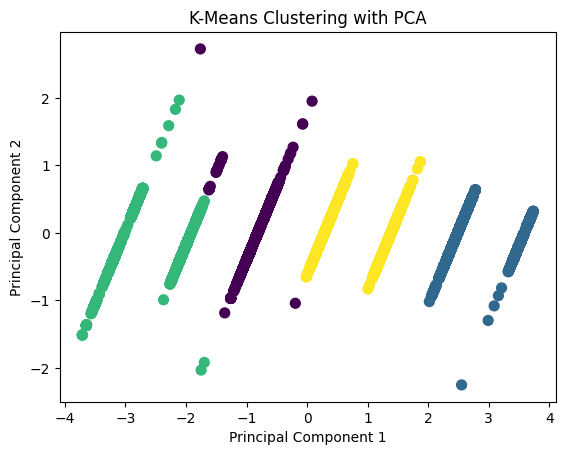

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = train[['Weight', 'NObeyesdad']]

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()


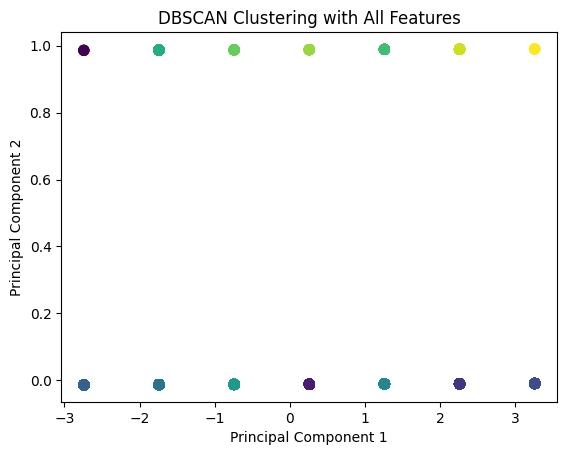

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = train[['SMOKE', 'NObeyesdad']]

dbscan = DBSCAN(eps=0.5, min_samples=5) 
labels = dbscan.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering with All Features')
plt.show()


In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
""""
X = train[['SMOKE', 'NObeyesdad']]

mean_shift = MeanShift()
labels = mean_shift.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Mean Shift Clustering with All Features')
plt.show()
"""

'"\nX = train[[\'SMOKE\', \'NObeyesdad\']]\n\nmean_shift = MeanShift()\nlabels = mean_shift.fit_predict(X)\n\npca = PCA(n_components=2)\nX_pca = pca.fit_transform(X)\n\nplt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap=\'viridis\', marker=\'o\')\nplt.xlabel(\'Principal Component 1\')\nplt.ylabel(\'Principal Component 2\')\nplt.title(\'Mean Shift Clustering with All Features\')\nplt.show()\n'

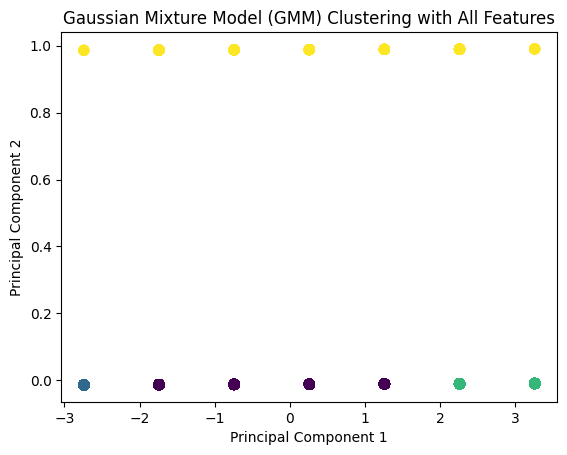

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = train[['SMOKE', 'NObeyesdad']]

gmm = GaussianMixture(n_components=4) 
labels = gmm.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gaussian Mixture Model (GMM) Clustering with All Features')
plt.show()


<a id ="10"></a>
# Deep Learning Methods

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU
from tensorflow.keras.optimizers import Adam  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = train.drop(columns=['Weight']) 
y = train['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(LeakyReLU())
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
optimizer = Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae']) 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=12, verbose=1)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):",mse)
print("R-squared (R2) Score:", r2)

2024-07-23 15:44:11.651316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 15:44:11.651502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 15:44:11.804108: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2052 - mae: 0.3368 - mse: 0.2052 - val_loss: 0.0618 - val_mae: 0.1926 - val_mse: 0.0618
Epoch 2/100
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0920 - mae: 0.2299 - mse: 0.0920 - val_loss: 0.0467 - val_mae: 0.1597 - val_mse: 0.0467
Epoch 3/100
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0802 - mae: 0.2139 - mse: 0.0802 - val_loss: 0.0662 - val_mae: 0.1979 - val_mse: 0.0662
Epoch 4/100
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0807 - mae: 0.2122 - mse: 0.0807 - val_loss: 0.0633 - val_mae: 0.1959 - val_mse: 0.0633
Epoch 5/100
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0742 - mae: 0.2038 - mse: 0.0742 - val_loss: 0.0477 - val_mae: 0.1632 - val_mse: 0.0477
Epoch 6/100
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0722 - mae: 0.2017 - mse: 0.0722 - val_loss: 0.0447 - val_mae: 0.1521 - val_mse: 0.0447
Epoch 7/100
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0716 - mae: 0.200

In [61]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = train.drop(columns=['Weight'])
y = train['Weight']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='tanh', input_shape=(1, X_train.shape[1])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)
y_pred = model.predict(X_test_reshaped)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Epoch 1/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2970
Epoch 2/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0472
Epoch 3/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0462
Epoch 4/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0457
Epoch 5/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0444
Epoch 6/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0412
Epoch 7/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0426
Epoch 8/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0418
Epoch 9/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0404
Epoch 10/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0414
Epoch 11/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0401
Epoch 12/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0421
Epoch 13/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0393
Epoch 14/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0396
Epoch 15/50
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo